## 滑动平均概念

- https://www.pythonheidong.com/blog/article/440904/66895dfdc4b399d20e68/

滑动平均滤波法 （又称：递推平均滤波法），它把连续取N个采样值看成一个队列 ，队列的长度固定为N ，每次采样到一个新数据放入队尾，并扔掉原来队首的一次数据(先进先出原则) 。把队列中的N个数据进行算术平均运算，就可获得新的滤波结果。

N值的选取：流量，N=12；压力：N=4；液面，N=4 ~ 12；温度，N=1~4

滑动平均的优缺点：

优点： 对周期性干扰有良好的抑制作用，平滑度高，适用于高频振荡的系统。

缺点： 灵敏度低，对偶然出现的脉冲性干扰的抑制作用较差，不易消除由于脉冲干扰所引起的采样值偏差，不适用于脉冲干扰比较严重的场合，比较浪费RAM 。

## numpy.convolve函数

numpy.convolve(a, v, mode=‘full’)  # 返回a和v的离散线性卷积。

a:(N,)输入的第一个一维数组
v:(M,)输入的第二个一维数组
mode:{‘full’, ‘valid’, ‘same’}参数可选，该参数指定np.convolve函数如何处理边缘。
mode可能的三种取值情况：
full’　默认值，返回每一个卷积值，长度是N+M-1,在卷积的边缘处，信号不重叠，存在边际效应。
‘same’　返回的数组长度为max(M, N),边际效应依旧存在。
‘valid’ 　返回的数组长度为max(M,N)-min(M,N)+1,此时返回的是完全重叠的点。边缘的点无效。

和一维卷积参数类似，a就是被卷积数据，v是卷积核大小。

## 代码示例

t= [-4.         -3.91919192 -3.83838384 -3.75757576 -3.67676768 -3.5959596
 -3.51515152 -3.43434343 -3.35353535 -3.27272727 -3.19191919 -3.11111111
 -3.03030303 -2.94949495 -2.86868687 -2.78787879 -2.70707071 -2.62626263
 -2.54545455 -2.46464646 -2.38383838 -2.3030303  -2.22222222 -2.14141414
 -2.06060606 -1.97979798 -1.8989899  -1.81818182 -1.73737374 -1.65656566
 -1.57575758 -1.49494949 -1.41414141 -1.33333333 -1.25252525 -1.17171717
 -1.09090909 -1.01010101 -0.92929293 -0.84848485 -0.76767677 -0.68686869
 -0.60606061 -0.52525253 -0.44444444 -0.36363636 -0.28282828 -0.2020202
 -0.12121212 -0.04040404  0.04040404  0.12121212  0.2020202   0.28282828
  0.36363636  0.44444444  0.52525253  0.60606061  0.68686869  0.76767677
  0.84848485  0.92929293  1.01010101  1.09090909  1.17171717  1.25252525
  1.33333333  1.41414141  1.49494949  1.57575758  1.65656566  1.73737374
  1.81818182  1.8989899   1.97979798  2.06060606  2.14141414  2.22222222
  2.3030303   2.38383838  2.46464646  2.54545455  

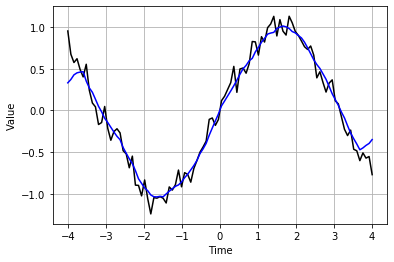

In [1]:
# 实现数据可视化中的数据平滑
import numpy as np
import matplotlib.pylab as plt
 
'''
其它的一些知识点：
raise：当程序发生错误，python将自动引发异常，也可以通过raise显示的引发异常
一旦执行了raise语句，raise语句后面的语句将不能执行
'''
 
def moving_average(interval, windowsize):
    window = np.ones(int(windowsize)) / float(windowsize)
    re = np.convolve(interval, window, 'same')
    return re
 
def LabberRing():
    t = np.linspace(-4, 4, 100)   # np.linspace 等差数列,从-4到4生成100个数
    print('t=', t)
 # np.random.randn 标准正态分布的随机数，np.random.rand 随机样本数值
    y = np.sin(t) + np.random.randn(len(t)) * 0.1   # 标准正态分布中返回1个，或者多个样本值
    print('y=', y)
    
    plt.plot(t, y, 'k')     # plot(横坐标，纵坐标， 颜色)
    
    y_av = moving_average(y, 10)
    plt.plot(t, y_av, 'b')
    plt.xlabel('Time')
    plt.ylabel('Value')
    # plt.grid()网格线设置
    plt.grid(True)
    plt.show()
    return
 
LabberRing()  # 调用函数